# IMPORT DES DONNEES ET LIBRERIES ET DEFINITION FUNCTIONS

##### -------------------------------------------------------------------------

##### J'import des donnèes et je declare certains functions

##### -------------------------------------------------------------------------

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage


from sklearn.cluster import AgglomerativeClustering

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
dispo= pd.read_csv ("DAN-P9-data/DisponibiliteAlimentaire_2017.csv")
population= pd.read_csv ("DAN-P9-data/Population_2000_2018.csv")

# DISPLAY DES DONNES

##### -------------------------------------------------------------------------

##### Je verifie des donnèes ont été bien chargées en les visualisant

##### -------------------------------------------------------------------------

In [3]:
print ( display(dispo)  , display(population) )
#ele,emts:
# production: pays qui ont plus de production
# disponibilite interieure
# importations

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


None None


In [4]:
print (dispo.dtypes ,"\n\n\n", population.dtypes,"\n\n")

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object 


 Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       obj

# DESCRIBE ET INFO

##### -------------------------------------------------------------------------

##### Je regarde les donnèes et sa estructure avec describe et info

##### -------------------------------------------------------------------------

In [5]:
dispo.info()
dispo.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,176600,176600,176600.000000,176600,176600.000000,176600,176600.000000,176600,176600.0,176600.0,176600,176600.000000,176600,176600
unique,1,1,NaN,174,NaN,17,NaN,98,NaN,NaN,4,NaN,2,2
top,FBS,Nouveaux Bilans Alimentaire,NaN,Tchad,NaN,Disponibilité intérieure,NaN,Maïs et produits,NaN,NaN,Milliers de tonnes,NaN,S,Données standardisées
freq,176600,176600,NaN,1416,NaN,15905,NaN,2593,NaN,NaN,118487,NaN,118487,118487
mean,NaN,NaN,125.474740,NaN,3810.052894,NaN,2628.778545,NaN,2017.0,2017.0,NaN,210.554918,NaN,NaN
std,NaN,NaN,72.941699,NaN,2211.790089,NaN,91.993247,NaN,0.0,0.0,NaN,4762.047787,NaN,NaN
min,NaN,NaN,1.000000,NaN,645.000000,NaN,2511.000000,NaN,2017.0,2017.0,NaN,-10388.000000,NaN,NaN
25%,NaN,NaN,63.000000,NaN,684.000000,NaN,2556.000000,NaN,2017.0,2017.0,NaN,0.000000,NaN,NaN
50%,NaN,NaN,120.000000,NaN,5142.000000,NaN,2612.000000,NaN,2017.0,2017.0,NaN,0.120000,NaN,NaN
75%,NaN,NaN,188.000000,NaN,5301.000000,NaN,2732.000000,NaN,2017.0,2017.0,NaN,8.462500,NaN,NaN


In [6]:
population.info()
population.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,4411,4411,4411.000000,4411,4411.0,4411,4411.0,4411,4411.000000,4411.000000,4411,4.411000e+03,4411,4411,258
unique,1,1,NaN,238,NaN,1,NaN,1,NaN,NaN,1,NaN,2,2,1
top,OA,Séries temporelles annuelles,NaN,Afghanistan,NaN,Population totale,NaN,Population-Estimations,NaN,NaN,1000 personnes,NaN,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
freq,4411,4411,NaN,19,NaN,4411,NaN,4411,NaN,NaN,4411,NaN,4374,4374,258
mean,NaN,NaN,132.202902,NaN,511.0,NaN,3010.0,NaN,2009.068238,2009.068238,NaN,2.963004e+04,NaN,NaN,NaN
std,NaN,NaN,75.854840,NaN,0.0,NaN,0.0,NaN,5.481539,5.481539,NaN,1.238029e+05,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.0,NaN,3010.0,NaN,2000.000000,2000.000000,NaN,7.850000e-01,NaN,NaN,NaN
25%,NaN,NaN,68.000000,NaN,511.0,NaN,3010.0,NaN,2004.000000,2004.000000,NaN,3.921890e+02,NaN,NaN,NaN
50%,NaN,NaN,132.000000,NaN,511.0,NaN,3010.0,NaN,2009.000000,2009.000000,NaN,4.764741e+03,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,511.0,NaN,3010.0,NaN,2014.000000,2014.000000,NaN,1.821548e+04,NaN,NaN,NaN


# SHAPE, DUPLICATED ET NUNIQUE 

##### -------------------------------------------------------------------------

##### Je fais shape duplicated et nunique pour mieux connaître mes DataFrames

##### -------------------------------------------------------------------------

In [7]:
dispo.shape , population.shape

((176600, 14), (4411, 15))

In [8]:
dispo.duplicated().count(), population.duplicated().count()

(176600, 4411)

In [9]:
print( "nunique:\n\ndispo:\n",dispo.nunique(),"\n\n\n\npopulation:\n",population.nunique())

nunique:

dispo:
 Code Domaine                 1
Domaine                      1
Code zone                  174
Zone                       174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7250
Symbole                      2
Description du Symbole       2
dtype: int64 



population:
 Code Domaine                 1
Domaine                      1
Code zone                  238
Zone                       238
Code Élément                 1
Élément                      1
Code Produit                 1
Produit                      1
Code année                  19
Année                       19
Unité                        1
Valeur                    4398
Symbole                      2
Description du Symbole       2
Note                         1
dtype: int64


# FILLNA ET VALEURS NULLS

##### -------------------------------------------------------------------------

##### Je fais isnull pour savoir combien nulls j'ai, dan ce cas, je n'ai pas

##### -------------------------------------------------------------------------

In [10]:
print( "fillna:\n\ndispo:\n",dispo.isnull().sum(), "\n\npopulation:\n",population.isnull().sum() )

fillna:

dispo:
 Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64 

population:
 Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64


# VALEURS STANDARDISÉES

In [11]:
population[population['Année']==2018].nunique()

Code Domaine                1
Domaine                     1
Code zone                 236
Zone                      236
Code Élément                1
Élément                     1
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Unité                       1
Valeur                    236
Symbole                     2
Description du Symbole      2
Note                        1
dtype: int64

In [12]:
population['Symbole'][population['Année']==2018].unique()

array(['X', 'A'], dtype=object)

In [13]:
pcolumns=['Code zone','Zone','Population total', 'Valeur']

In [14]:
population['Population total']=population['Valeur']*1000

In [15]:
dispo

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


In [16]:
pop=population[['Zone', 'Population total', 'Élément','Produit','Année','Unité', 'Valeur']][population['Année']==2018 ]

In [17]:
#dispo.pivot(columns=['Zone','Produit'], values='Zone')

In [18]:
#a.pivot_table( values='D', index=['A', 'B'],
#                    columns=['C'], aggfunc=np.sum)

In [19]:
#a

# PIVOT TABLES

In [20]:
dis=dispo.pivot_table( values='Valeur', index=['Zone','Produit'],
                    columns=['Élément'], aggfunc=np.sum)

In [21]:
dis=dis.reset_index()

In [22]:
dis=dis.fillna(0)

# CHAMP CALCULÉ

In [23]:
dis['Balance Commerciale']=dis['Exportations - Quantité']-dis['Importations - Quantité']

# PREMIER RECHERCHE CORRÉLATIONS

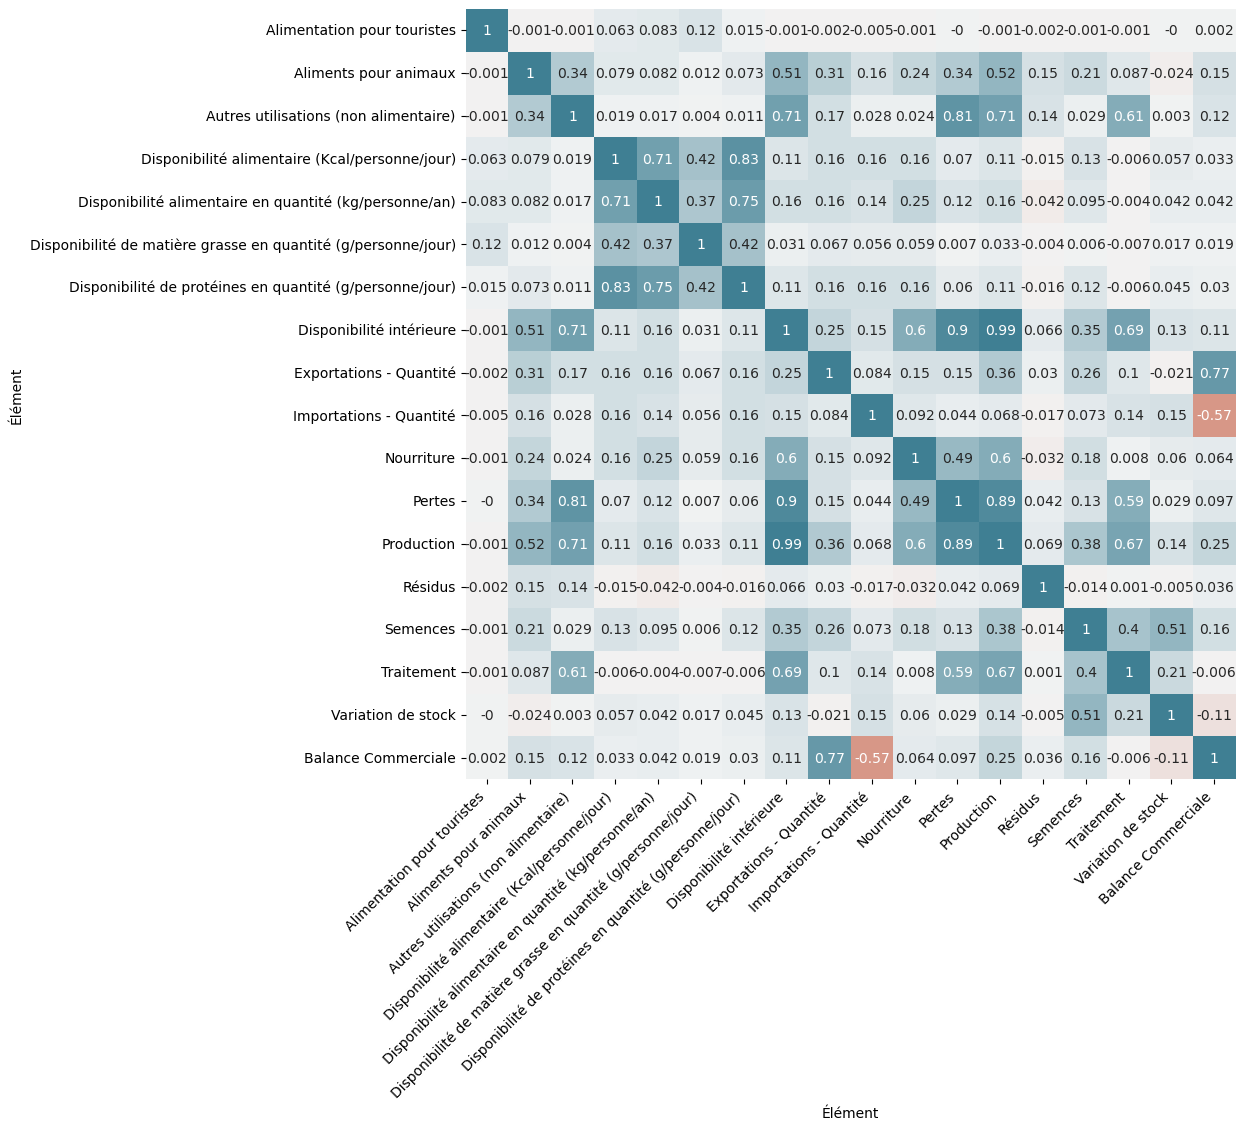

In [24]:
corr_matrix = dis.corr(method='pearson')
corr_matrix=round (corr_matrix, 3)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.heatmap(corr_matrix, annot     = True, cbar      = False,annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,center    = 0, cmap      = sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
plt.show()

In [25]:
dis=dis[['Zone', 'Produit',#'Aliments pour animaux','Autres utilisations (non alimentaire)',
            'Disponibilité alimentaire (Kcal/personne/jour)', #'Disponibilité intérieure',
             'Balance Commerciale',
             'Exportations - Quantité','Importations - Quantité', 'Production', 'Variation de stock'
            ]]

In [26]:
#corr_matrix = dis.corr(method='pearson')
#corr_matrix=round (corr_matrix, 3)
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
#sns.heatmap(corr_matrix, annot     = True, cbar      = False,annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,center    = 0, cmap      = sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
#plt.show()

# SÉLECTION COLOMNES PRODUITS

In [27]:
dis=dis[# (dis['Produit']=='Viande d\'Ovins/Caprins') |
           # (dis['Produit']=='Viande de Bovins' )|
            #(dis['Produit']=='Viande de Suides') |
            (dis['Produit']=='Viande de Volailles') #|
          # (dis['Produit']=='Viande, Autre') |
          # (dis['Produit']=='Viande de Anim Aquatiq') 
           ]

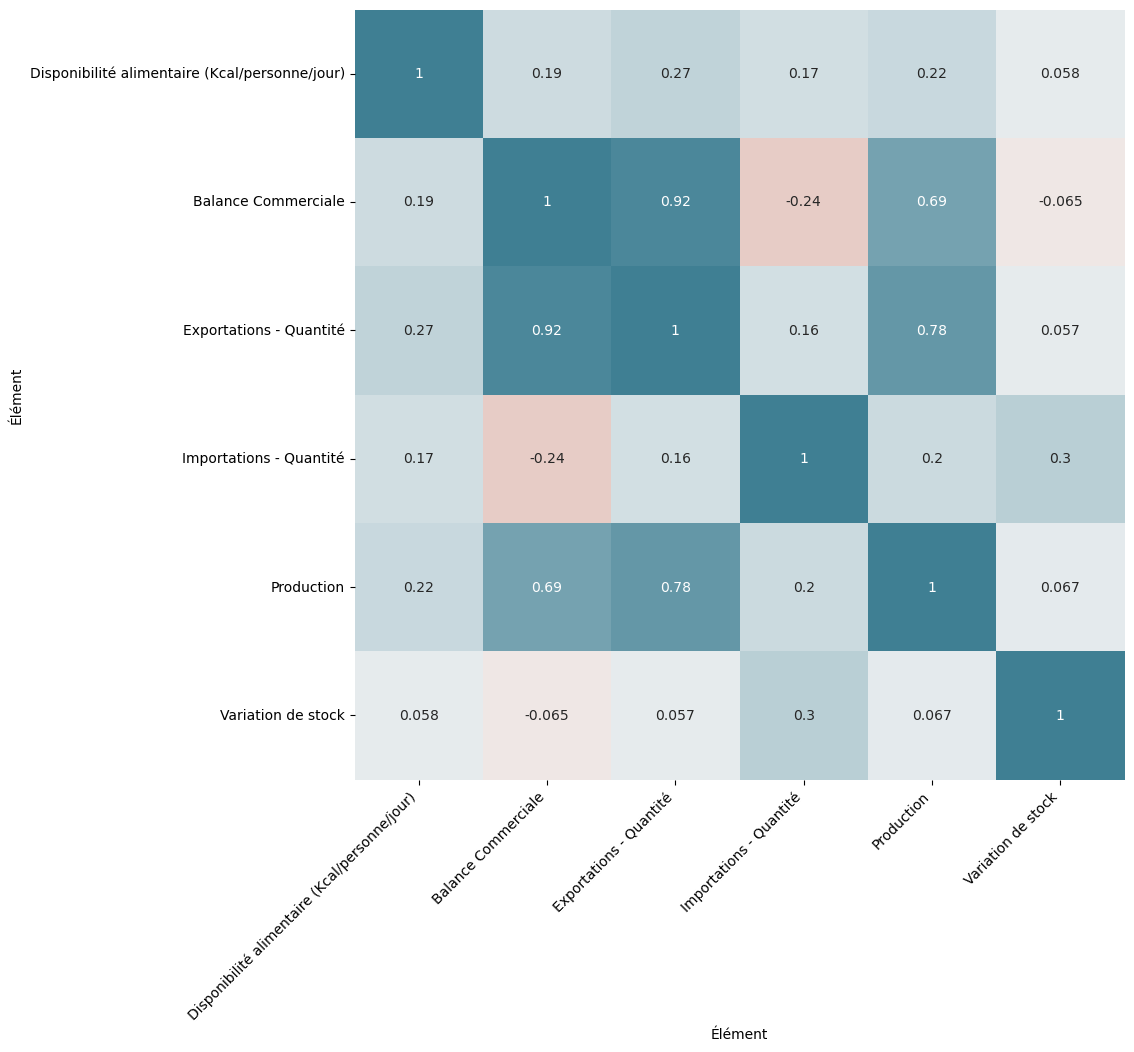

In [28]:
corr_matrix = dis.corr(method='pearson')
corr_matrix=round (corr_matrix, 3)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.heatmap(corr_matrix, annot     = True, cbar      = False,annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,center    = 0, cmap      = sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
plt.show()

In [29]:
dis.describe(include='all')

Élément,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Balance Commerciale,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
count,172,172,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
unique,172,1,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,Viande de Volailles,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,172,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,74.558140,15.261628,103.750000,88.488372,708.325581,13.430233
std,NaN,NaN,60.571277,465.847597,458.066125,185.824620,2474.456332,74.722417
min,NaN,NaN,0.000000,-1059.000000,0.000000,0.000000,0.000000,-119.000000
25%,NaN,NaN,22.000000,-37.250000,0.000000,3.000000,11.000000,0.000000
50%,NaN,NaN,64.000000,-9.000000,0.000000,16.000000,66.000000,0.000000
75%,NaN,NaN,105.500000,0.000000,12.000000,79.750000,368.750000,7.000000


In [30]:
#dis['Disponibilité intérieure'].loc[dis['Disponibilité intérieure']<0]=0

# GROUPBY ZONE

In [31]:
#GROUP BY AGG
disg=dis.groupby(['Zone']).sum()

# MERGE

## MERGE DISPO AVEC GROUP BY ET POPULATION

In [32]:
disp= pd.merge(disg, pop[['Zone','Population total']] , on='Zone', how='left')

## READ ET MERGE PIB

In [33]:
pib= pd.read_csv ("pib.csv",sep=';', on_bad_lines='warn')
#SOURCE: https://donnees.banquemondiale.org/indicateur/NY.GDP.PCAP.CD
# Le Venezuela, Taïwan et la Corée du Nord ont été estimés à partir
# de différentes sources car il n'y a pas de données officielles. 
pib['Pib Per hab (2018, $)']=round (pib['Pib Per hab (2018, $)'] , 2)

In [34]:
dispp= pd.merge(disp, pib , on='Zone', how='left')

## READ, MERGE ET CHANGER LE NOM STABILITE

In [35]:
stabilite= pd.read_csv ("PoliticalStability.csv",sep=',', on_bad_lines='warn')
#SOURCE: projet 8

In [36]:
stabilite['Zone']=stabilite['Country']
stabilite['Stabilité politique']=stabilite['Political_Stability']
stabilite=stabilite[stabilite['Year']==2018]
stabilite=stabilite[['Zone','Stabilité politique']]

In [37]:
stabilite.describe(include='all')

,Zone,Stabilité politique
count,198,198.000000
unique,198,NaN
top,Afghanistan,NaN
freq,1,NaN
mean,NaN,-0.059949
std,NaN,0.992712
min,NaN,-3.000000
25%,NaN,-0.630000
50%,NaN,0.030000
75%,NaN,0.750000


In [38]:
#new_row = pd.Series({'Zone' : 'Stabilité politique' , 'Nouvelle-Calédonie' : 0.11})
new_row = pd.Series({'Zone' : 'Nouvelle-Calédonie' ,'Stabilité politique' : 0.11})
stabilite=pd.concat([stabilite, new_row.to_frame().T])
new_row = pd.Series({'Zone' : 'Polynésie française' ,'Stabilité politique' : 0.11})
stabilite=pd.concat([stabilite, new_row.to_frame().T])


In [39]:
stabilite.replace({"United States of America": 'États-Unis d\'Amérique',
                  'Uzbekistan' :'Ouzbékistan',
                   'United Kingdom of Great Britain and Northern Ireland' :'Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord',
                   'United Arab Emirates': 'Émirats arabes unis',
                   'United Republic of Tanzania' :'République-Unie de Tanzanie',
                   'Uganda': 'Ouganda',
                   'Zambia': 'Zambie',
                   'Venezuela (Bolivarian Republic of)':'Venezuela (République bolivarienne du)',
                   'Tunisia': 'Tunisie',
                   'Turkey': 'Turquie',
                   'Turkmenistan': 'Turkménistan',
                   'Yemen': 'Yémen',
                   'Thailand': 'Thaïlande',
                   'Trinidad and Tobago': 'Trinité-et-Tobago',
                   'Egypt': 'Égypte',
                   'Chad':'Tchad',
                   'Czechia': 'Tchéquie',
                   'Ecuador':'Équateur',
                   'Germany': 'Allemagne',
                   'Algeria': 'Algérie',
                   'South Africa':'Afrique du Sud',
                   'Antigua and Barbuda':'Antigua-et-Barbuda',
                   'Ethiopia':'Éthiopie',
                   'Australia':'Australie',
                   'Switzerland': 'Suisse',
                   'Argentina':'Argentine',
                   'Albania': 'Albanie',
                   'Saudi Arabia': 'Arabie saoudite',
                   'Austria':'Autriche',
                   'Azerbaijan':'Azerbaïdjan',
                   'Sudan':'Soudan',
                   'Sweden': 'Suède',
                   'Senegal': 'Sénégal',
                   'Tajikistan':'Tadjikistan',
                   'Solomon Islands': 'Îles Salomon',
                   'Armenia': 'Arménie',
                   'Barbados': 'Barbade',
                   'Belgium': 'Belgique',
                   'Bolivia (Plurinational State of)' :'Bolivie (État plurinational de)',
                   'Bosnia and Herzegovina' : 'Bosnie-Herzégovine',
                   'Saint Lucia': 'Sainte-Lucie',
                   'Sao Tome and Principe': 'Sao Tomé-et-Principe',
                   'Serbia': 'Serbie',
                   'Slovakia': 'Slovaquie',
                   'Slovenia': 'Slovénie',
                   'Brazil': 'Brésil',
                   'Bulgaria': 'Bulgarie',
                   'Belarus': 'Bélarus',
                   'Benin': 'Bénin',
                   'Cambodia': 'Cambodge',
                   'Dominican Republic': 'République dominicaine',
                   'Lao People\'s Democratic Republic': 'République démocratique populaire lao',
                   'Saint Kitts and Nevis': 'Saint-Kitts-et-Nevis',
                   'Saint Vincent and the Grenadines': 'Saint-Vincent-et-les Grenadines',
                   'Cameroon': 'Cameroun',
                   'Chile': 'Chili',
                   'China, Macao SAR': 'Chine - RAS de Macao',
                   'Romania': 'Roumanie',
                   'China, Hong Kong SAR': 'Chine - RAS de Hong-Kong',
                   'China, Taiwan Province of': 'Chine, Taiwan Province de',
                   'China, mainland': 'Chine, continentale',
                   'Cyprus': 'Chypre',
                   'Colombia': 'Colombie',
                   'Croatia': 'Croatie',
                   'Denmark': 'Danemark',
                   'Dominica': 'Dominique',
                   'Spain' : 'Espagne',
                   'Estonia': 'Estonie',
                   'Fiji': 'Fidji',
                   'Russian Federation': 'Fédération de Russie',
                   'Greece': 'Grèce',
                   'Finland': 'Finlande',
                   'Georgia':'Géorgie',
                   'Guinea': 'Guinée',
                   'Guinea-Bissau': 'Guinée-Bissau',
                   'Haiti': 'Haïti',
                   'Hungary': 'Hongrie',
                   'India': 'Inde',
                   'Indonesia': 'Indonésie',
                   'Iran (Islamic Republic of)': 'Iran (République islamique d\')',
                   'Ireland': 'Irlande',
                   'Israel': 'Israël',
                   'Italy': 'Italie',
                   'Jamaica': 'Jamaïque',
                   'Japan': 'Japon',
                   'Gambia': 'Gambie',
                   'Grenada': 'Grenade',
                   'Iceland': 'Islande',
                   'Jordan': 'Jordanie',
                   'Kyrgyzstan': 'Kirghizistan',
                   'Kuwait': 'Koweït',
                   'Latvia': 'Lettonie',
                   'Lebanon': 'Liban',
                   'Liberia': 'Libéria',
                   'Lithuania': 'Lituanie',
                   'North Macedonia': 'Macédoine du Nord',
                   'Malaysia': 'Malaisie',
                   'Malta': 'Malte',
                   'Morocco': 'Maroc',
                   'Mauritius': 'Maurice',
                   'Mauritania': 'Mauritanie',
                   'Mexico': 'Mexique',
                   'Mongolia': 'Mongolie',
                   'Montenegro': 'Monténégro',
                   'Namibia': 'Namibie',
                   'Nigeria': 'Nigéria',
                   'Norway':'Norvège',
                   'Nepal':'Népal',
                   'Poland': 'Pologne',
                   'Netherlands': 'Pays-Bas',
                   'Democratic People\'s Republic of Korea': 'République populaire démocratique de Corée',
                   'Republic of Korea': 'République de Corée',
                   'Peru': 'Pérou',
                   'New Zealand': 'Nouvelle-Zélande',
                   'Central African Republic': 'République centrafricaine',
                   'Republic of Moldova': 'République de Moldova'
                  
                  }, inplace=True)
#stabilite[stabilite['Zone']=='Nouvelle-Calédonie']
#stabilite[['Zone']][stabilite['Zone']=='United States of America']=='États-Unis d\'Amérique'

In [40]:
#stabilite[stabilite['Zone']=='Nouvelle-Calédonie']
#stabilite[stabilite['Zone']=='Polynésie française']

In [41]:
dispps= pd.merge(dispp, stabilite , on='Zone', how='left')

In [42]:
dispps[dispps.isnull().any(1)]

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Balance Commerciale,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population total,"Pib Per hab (2018, $)",Stabilité politique


In [43]:
dispp.describe(include='all')

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Balance Commerciale,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population total,"Pib Per hab (2018, $)"
count,172,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02,172.000000
unique,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,74.558140,15.261628,103.750000,88.488372,708.325581,13.430233,4.330265e+07,14911.298721
std,NaN,60.571277,465.847597,458.066125,185.824620,2474.456332,74.722417,1.542364e+08,20421.287702
min,NaN,0.000000,-1059.000000,0.000000,0.000000,0.000000,-119.000000,5.244100e+04,435.930000
25%,NaN,22.000000,-37.250000,0.000000,3.000000,11.000000,0.000000,2.862371e+06,2089.837500
50%,NaN,64.000000,-9.000000,0.000000,16.000000,66.000000,0.000000,9.828518e+06,6175.850000
75%,NaN,105.500000,0.000000,12.000000,79.750000,368.750000,7.000000,3.098935e+07,18915.550000


In [44]:
#dispp=dispp.fillna(0)

In [45]:
dispps.describe(include='all')

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Balance Commerciale,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population total,"Pib Per hab (2018, $)",Stabilité politique
count,172,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02,172.000000,172.000000
unique,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,74.558140,15.261628,103.750000,88.488372,708.325581,13.430233,4.330265e+07,14911.298721,-0.065058
std,NaN,60.571277,465.847597,458.066125,185.824620,2474.456332,74.722417,1.542364e+08,20421.287702,0.895530
min,NaN,0.000000,-1059.000000,0.000000,0.000000,0.000000,-119.000000,5.244100e+04,435.930000,-3.000000
25%,NaN,22.000000,-37.250000,0.000000,3.000000,11.000000,0.000000,2.862371e+06,2089.837500,-0.572500
50%,NaN,64.000000,-9.000000,0.000000,16.000000,66.000000,0.000000,9.828518e+06,6175.850000,0.025000
75%,NaN,105.500000,0.000000,12.000000,79.750000,368.750000,7.000000,3.098935e+07,18915.550000,0.665000


# CORRELATIONS 

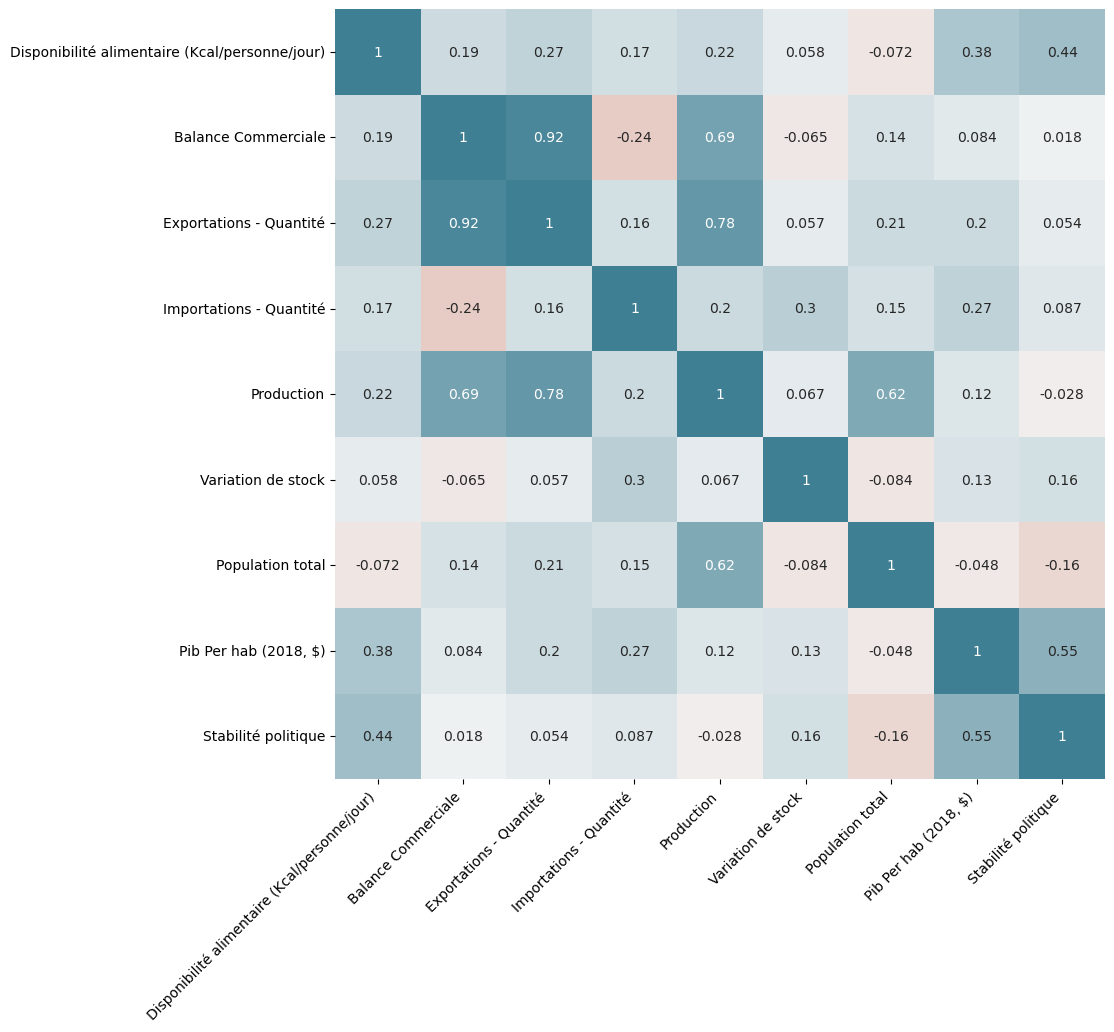

In [46]:
corr_matrix = dispps.corr(method='pearson')
corr_matrix=round (corr_matrix, 3)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.heatmap(corr_matrix, annot     = True, cbar      = False,annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,center    = 0, cmap      = sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
plt.show()

# HISTOGRAMMES 

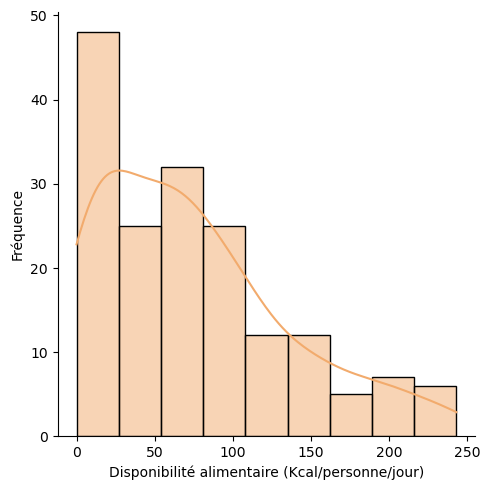

In [47]:
sns.displot(dispps['Disponibilité alimentaire (Kcal/personne/jour)'] , color='#F2AB6D',
 kde=True)
plt.ylabel('Fréquence')
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.show()
#sns.displot(dispps['Disponibilité intérieure'], bins=10, kde=True)
#plt.ylabel('Fréquence')
#plt.xlabel('Disponibilité intérieure')
#plt.show()


#fig, axes = plt.subplots(1, 2)
#sns.lineplot(x = 'Day', y = 'Price 1',data = df, ax = axes[0])
#sns.lineplot(x = 'Day', y = 'Price 2',data = df, ax = axes[1])
#axes[0].set_title("First")
#axes[1].set_title("Second")
#plt.suptitle("Main")

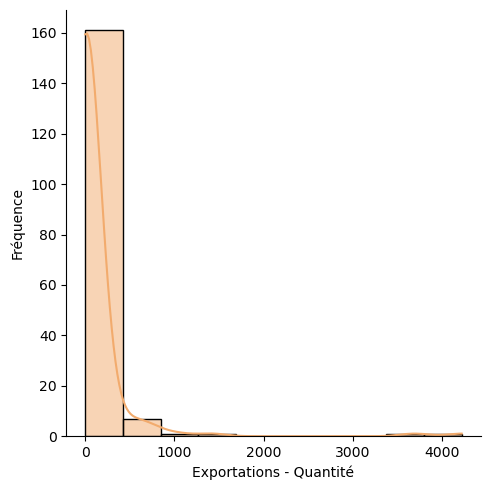

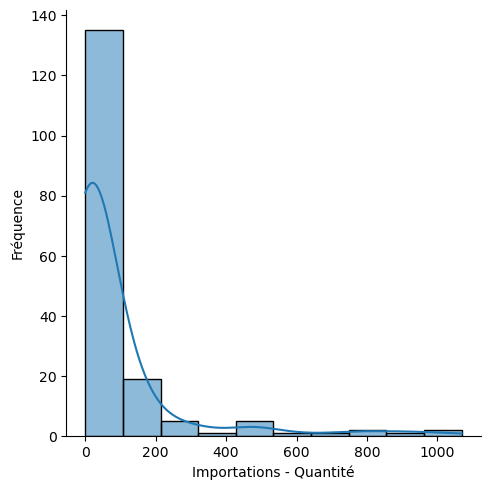

In [48]:
sns.displot(dispps['Exportations - Quantité'], bins=10, color='#F2AB6D', kde=True)
plt.ylabel('Fréquence')
plt.xlabel('Exportations - Quantité')
plt.show()
sns.displot(dispps['Importations - Quantité'], bins=10, kde=True)
plt.ylabel('Fréquence')
plt.xlabel('Importations - Quantité')
plt.show()

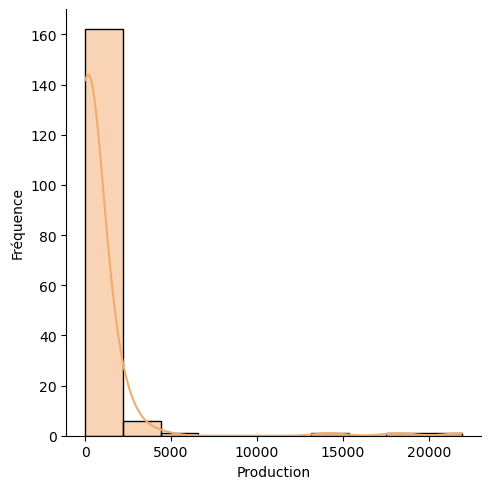

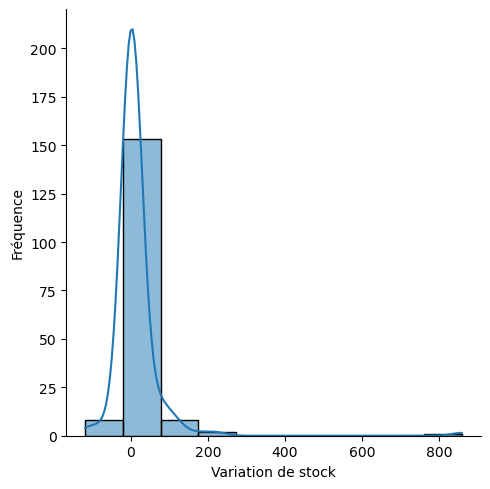

In [49]:
sns.displot(dispps['Production'], bins=10,color='#F2AB6D', kde=True)
plt.ylabel('Fréquence')
plt.xlabel('Production')
plt.show()
sns.displot(dispps['Variation de stock'], bins=10, kde=True)
plt.ylabel('Fréquence')
plt.xlabel('Variation de stock')
plt.show()

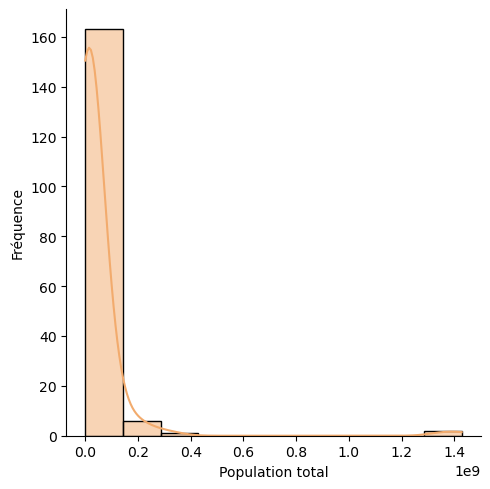

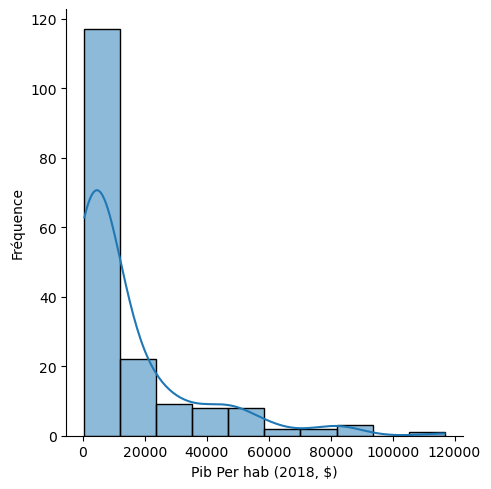

In [50]:
sns.displot(dispps['Population total'], bins=10,color='#F2AB6D', kde=True)
plt.ylabel('Fréquence')
plt.xlabel('Population total')
plt.show()

sns.displot(dispps['Pib Per hab (2018, $)'], bins=10, kde=True)
plt.ylabel('Fréquence')
plt.xlabel('Pib Per hab (2018, $)')
plt.show()


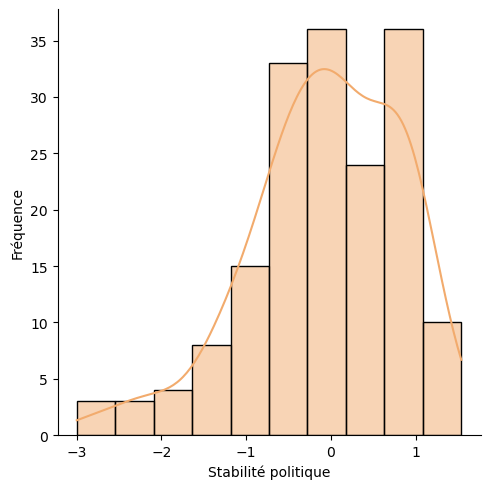

In [51]:
sns.displot(dispps['Stabilité politique'], bins=10, color='#F2AB6D',  kde=True)
plt.ylabel('Fréquence')
plt.xlabel('Stabilité politique')
plt.show()

# BOXPLOTS

<AxesSubplot:>

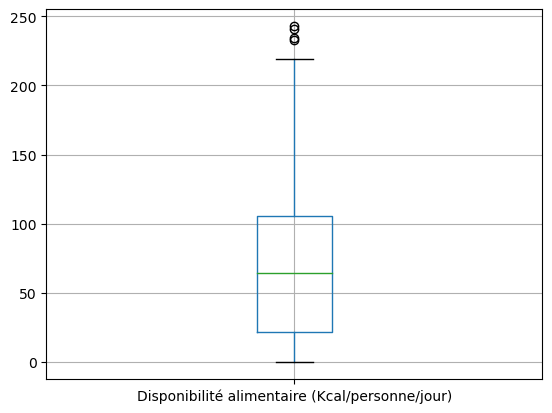

In [52]:
dispps[['Disponibilité alimentaire (Kcal/personne/jour)']].boxplot()

<AxesSubplot:>

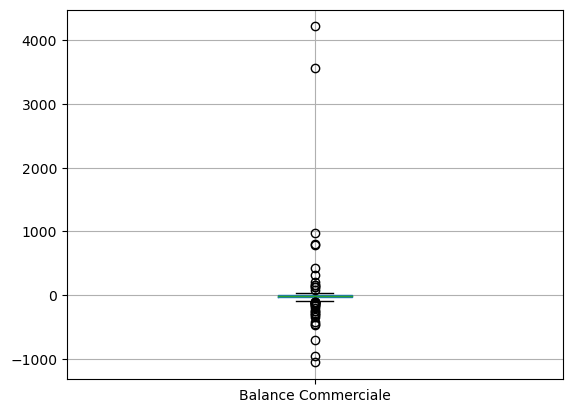

In [53]:
dispps[['Balance Commerciale']].boxplot()

<AxesSubplot:>

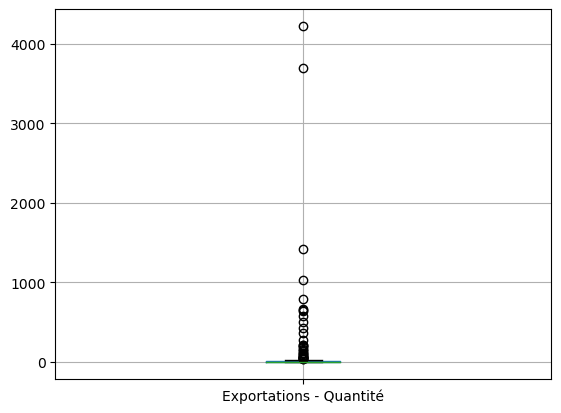

In [54]:
dispps[['Exportations - Quantité']].boxplot()

<AxesSubplot:>

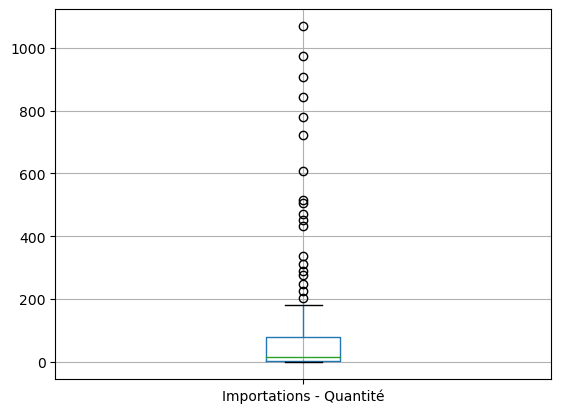

In [55]:
dispps[['Importations - Quantité']].boxplot()

<AxesSubplot:>

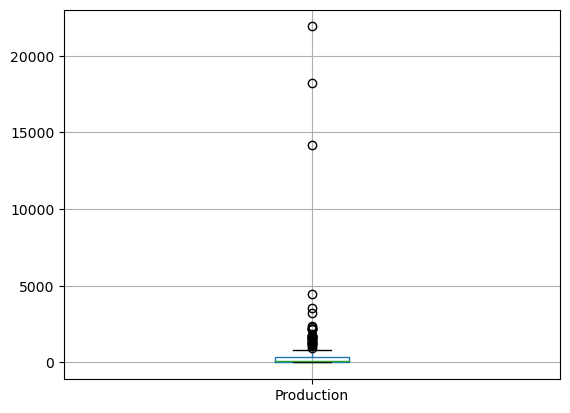

In [56]:
dispps[['Production']].boxplot()

<AxesSubplot:>

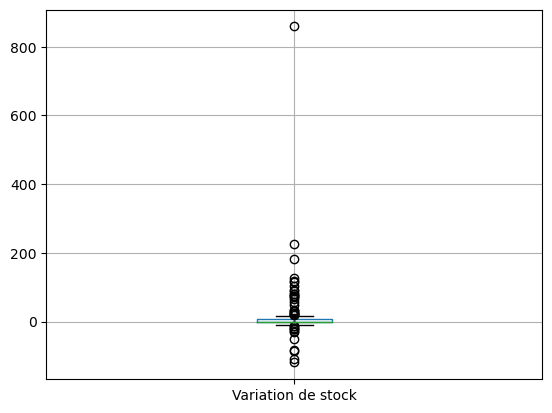

In [57]:
dispps[['Variation de stock']].boxplot()

<AxesSubplot:>

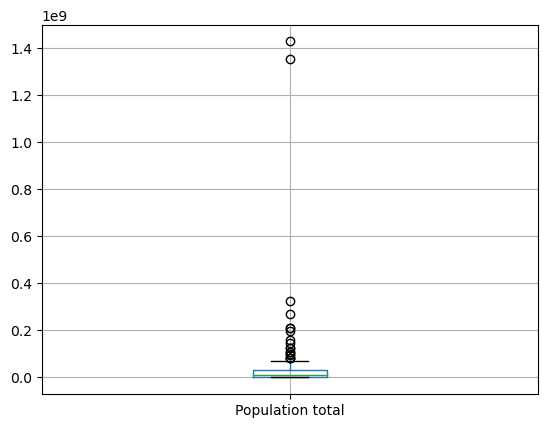

In [58]:
dispps[['Population total']].boxplot()

<AxesSubplot:>

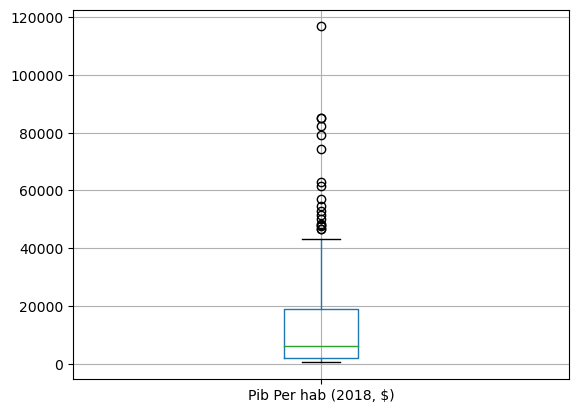

In [59]:
dispps[['Pib Per hab (2018, $)']].boxplot()

<AxesSubplot:>

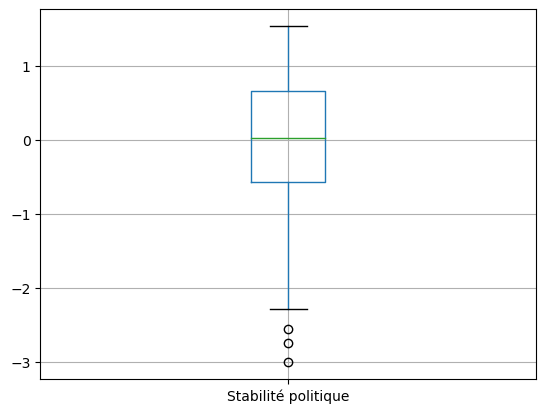

In [60]:
dispps[['Stabilité politique']].boxplot()

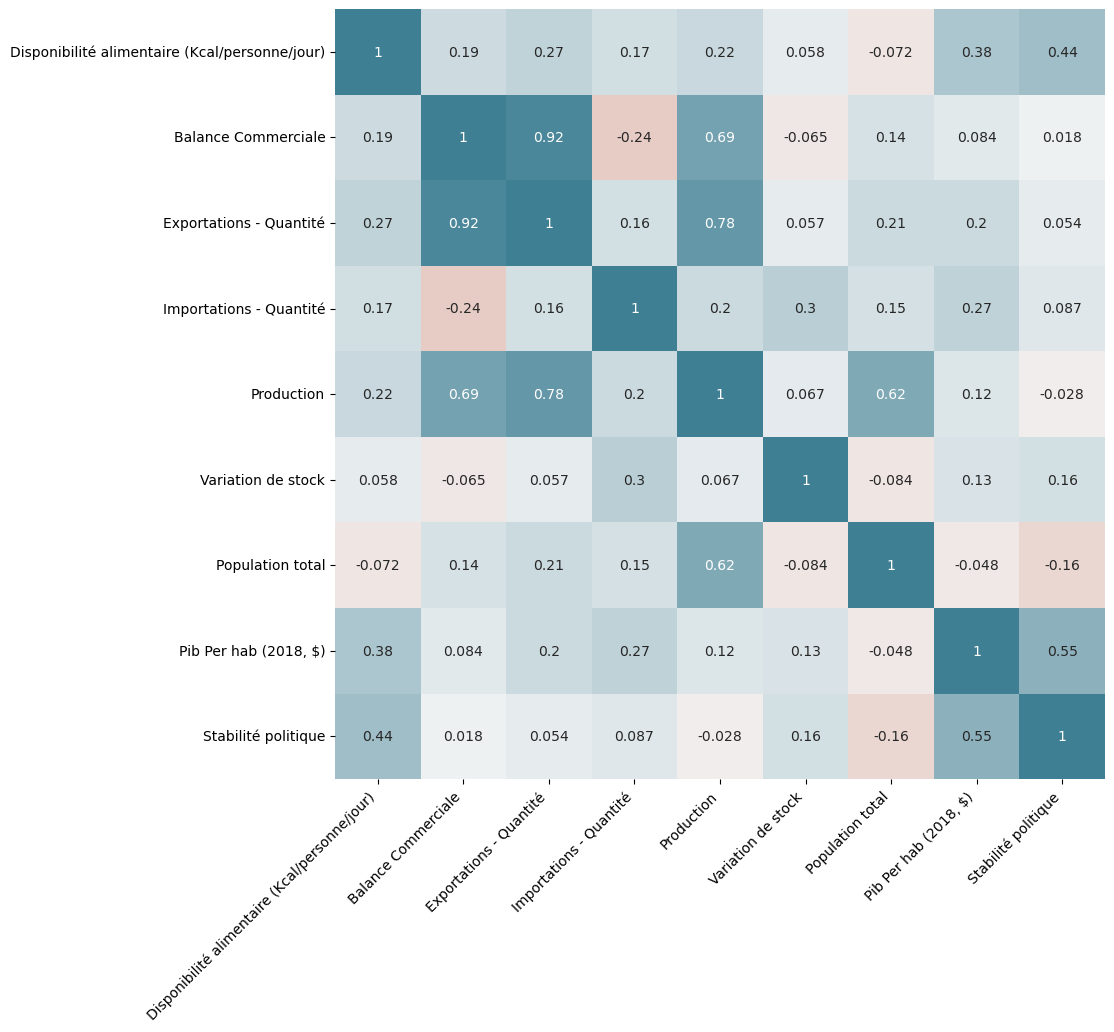

In [61]:
corr_matrix = dispps.corr(method='pearson')
corr_matrix=round (corr_matrix, 3)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.heatmap(corr_matrix, annot     = True, cbar      = False,annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,center    = 0, cmap      = sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
plt.show()

# TO CSV

In [62]:
dispps.to_csv("monDF.csv", index=False)

In [63]:
dispps

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Balance Commerciale,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population total,"Pib Per hab (2018, $)",Stabilité politique
0,Afghanistan,5.0,-29.0,0.0,29.0,28.0,0.0,37171921.0,502.06,-2.75
1,Afrique du Sud,143.0,-451.0,63.0,514.0,1667.0,0.0,57792518.0,7048.52,-0.28
2,Albanie,85.0,-38.0,0.0,38.0,13.0,4.0,2882740.0,5287.66,0.38
3,Algérie,22.0,-2.0,0.0,2.0,275.0,0.0,42228408.0,4171.80,-0.79
4,Allemagne,71.0,-196.0,646.0,842.0,1514.0,-29.0,83124418.0,47939.28,0.60
...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,147.0,-339.0,94.0,433.0,48.0,-26.0,9630959.0,46722.27,0.74
168,Équateur,83.0,0.0,0.0,0.0,340.0,-1.0,17084358.0,6321.35,-0.07
169,États-Unis d'Amérique,219.0,3569.0,3692.0,123.0,21914.0,80.0,327096265.0,62823.31,0.48
170,Éthiopie,0.0,-1.0,0.0,1.0,14.0,0.0,109224414.0,758.30,-1.34


In [64]:
dispps.describe()

,Disponibilité alimentaire (Kcal/personne/jour),Balance Commerciale,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population total,"Pib Per hab (2018, $)",Stabilité politique
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02,172.000000,172.000000
mean,74.558140,15.261628,103.750000,88.488372,708.325581,13.430233,4.330265e+07,14911.298721,-0.065058
std,60.571277,465.847597,458.066125,185.824620,2474.456332,74.722417,1.542364e+08,20421.287702,0.895530
min,0.000000,-1059.000000,0.000000,0.000000,0.000000,-119.000000,5.244100e+04,435.930000,-3.000000
25%,22.000000,-37.250000,0.000000,3.000000,11.000000,0.000000,2.862371e+06,2089.837500,-0.572500
50%,64.000000,-9.000000,0.000000,16.000000,66.000000,0.000000,9.828518e+06,6175.850000,0.025000
75%,105.500000,0.000000,12.000000,79.750000,368.750000,7.000000,3.098935e+07,18915.550000,0.665000
max,243.000000,4220.000000,4223.000000,1069.000000,21914.000000,859.000000,1.427648e+09,116786.510000,1.540000


In [65]:
#dispps['Disponibilité alimentaire (Kcal/personne/jour)']=(
#dispps['Disponibilité alimentaire (Kcal/personne/jour)']*1000*1000
#    /dispps['Population total']   
#)
dispps['Balance Commerciale']=dispps['Balance Commerciale']*1000*1000/dispps['Population total']
dispps['Exportations - Quantité']=dispps['Exportations - Quantité']*1000*1000/dispps['Population total']
dispps['Importations - Quantité']=dispps['Importations - Quantité']*1000*1000/dispps['Population total']
dispps['Production']=dispps['Production']*1000*1000/dispps['Population total']
dispps['Variation de stock']=dispps['Variation de stock']*1000*1000/dispps['Population total']
dispps['Stabilité politique']=dispps['Stabilité politique']*1000*1000/dispps['Population total']

dispps.rename(columns={'Balance Commerciale':'Balance Commerciale/kg/personne/an',
                      'Exportations - Quantité': 'Exportations - Quantité/kg/personne/an',
                       'Importations - Quantité': 'Importations - Quantité/kg/personne/an',
                       'Production': 'Production/kg/personne/an',
                       'Variation de stock': 'Variation de stock/kg/personne/an',
                       'Stabilité politique': 'Stabilité politique/personne/an'
                       #je mis *1000000 le valeur de chaque pays pour etre plus comprensible 
                       #et aprés divisé entre la population total parce que sinon j'aurai eu 0,000032 ou
                       # quelque chose comme ça
                      },inplace=True)



In [66]:
dispps.describe()

,Disponibilité alimentaire (Kcal/personne/jour),Balance Commerciale/kg/personne/an,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,Production/kg/personne/an,Variation de stock/kg/personne/an,Population total,"Pib Per hab (2018, $)",Stabilité politique/personne/an
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02,172.000000,172.000000
mean,74.558140,-7.358822,3.432721,10.791544,15.840078,1.249908,4.330265e+07,14911.298721,0.596525
std,60.571277,17.619144,11.103095,18.464676,17.165157,2.809301,1.542364e+08,20421.287702,2.132865
min,0.000000,-86.677646,0.000000,0.000000,0.000000,-4.806689,5.244100e+04,435.930000,-0.488603
25%,22.000000,-8.642870,0.000000,0.375696,2.052191,0.000000,2.862371e+06,2089.837500,-0.024904
50%,64.000000,-2.134917,0.000000,3.674551,9.332254,0.000000,9.828518e+06,6175.850000,0.000876
75%,105.500000,0.000000,1.460427,11.644742,24.541651,1.625781,3.098935e+07,18915.550000,0.143462
max,243.000000,47.480709,89.938183,123.037604,75.046090,12.665523,1.427648e+09,116786.510000,15.497382


# TO CSV avec balance, exportations, importations, etc, divisé par habitant et stabilité divisé par habitant et *1000000

In [67]:
dispps.to_csv("monDFparHab.csv", index=False)